<a href="https://colab.research.google.com/github/ameensidhiquemy/Sentiment-analysis-NLP/blob/master/nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pickle
import collections
import nltk.classify.util, nltk.metrics
from nltk.classify import NaiveBayesClassifier, MaxentClassifier, SklearnClassifier
import csv
from sklearn import model_selection
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import random
import itertools
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [ ]:
# loading cleaned training tweets
with open('/content/drive/My Drive/a/sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [ ]:
X=vectorizer.fit_transform(SentimentText)
train_data = pd.read_csv('/content/drive/My Drive/a/data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [ ]:
#split into train and test with 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [ ]:
# fitting the Naïve Bayes classifier to training data
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# compute training score
classifier.score(X_train,y_train)

0.821979972746934

In [ ]:
y_predicted = classifier.predict(X_test)
# compute testing score
classifier.score(X_test, y_test)

0.7537753775377538

In [ ]:
# function to plot confusion matrix from official sklearn documentation
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6272 2510]
 [2414 8802]]
Normalized confusion matrix
[[0.71 0.29]
 [0.22 0.78]]


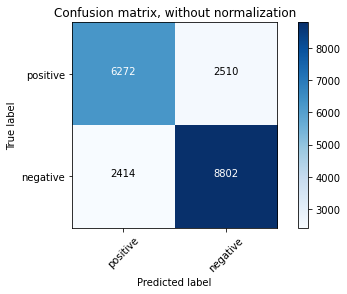

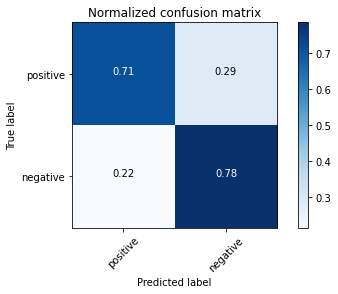

In [ ]:
# Computing confusion matrix
matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)

# Plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plotting normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

USING BIGRAMS

In [ ]:
# Loading bigram representation  
bigram=CountVectorizer(ngram_range=(1,2))

In [ ]:
with open('/content/drive/My Drive/a/sentiments/SentimentText_train.txt', 'rb') as f:
    Text = pickle.load(f)

In [ ]:
X=bigram.fit_transform(Text)

In [ ]:
train = pd.read_csv('/content/drive/My Drive/a/data/train.csv', encoding = 'ISO-8859-1')
y = train['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# training score
classifier.score(X_train, y_train)

0.9352552162118238

In [ ]:
y_predicted = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.9336433643364337

Confusion matrix, without normalization
[[ 8111   671]
 [  656 10560]]
Normalized confusion matrix
[[0.92 0.08]
 [0.06 0.94]]


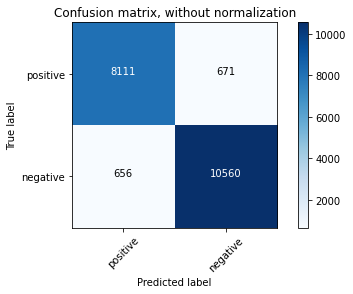

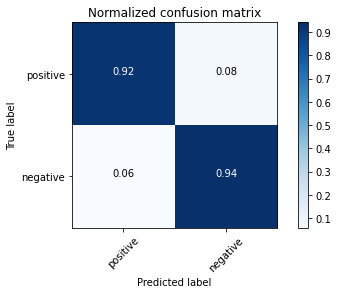

In [ ]:
# Compute confusion matrix
matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)

# non-normalized 
plt.figure()
plot_confusion_matrix(matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# normalized
plt.figure()
plot_confusion_matrix(matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

USING BOTH UNIGRAMS AND BIGRAMS


In [ ]:
#unigram 
from sklearn.feature_extraction.text import CountVectorizer
uni=CountVectorizer()

#bigram  
bi=CountVectorizer(ngram_range=(1,2))

In [ ]:
with open('/content/drive/My Drive/a/sentiments/SentimentText_train.txt', 'rb') as f:
    Text = pickle.load(f)

In [ ]:
X_uni = uni.fit_transform(SentimentText)
X_bi = bi.fit_transform(SentimentText)

In [ ]:
from scipy.sparse import hstack 
X = hstack([X_uni , X_bi])

In [ ]:
train = pd.read_csv('/content/drive/My Drive/a/data/train.csv', encoding = 'ISO-8859-1')
y = train['Sentiment']

In [ ]:

X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#train score
classifier.score(X_train,y_train)

0.9195159455438737

In [ ]:
y_predicted = classifier.predict(X_test)
# testing score
classifier.score(X_test, y_test)

0.7695269526952695

Confusion matrix, without normalization
[[6639 2143]
 [2466 8750]]
Normalized confusion matrix
[[0.76 0.24]
 [0.22 0.78]]


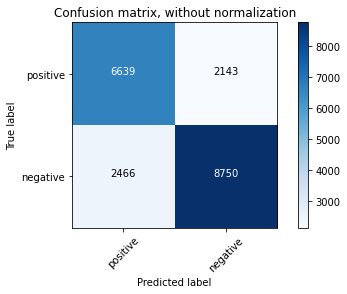

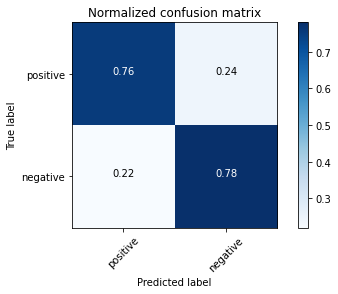

In [ ]:
# Compute confusion matrix
matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)

#non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()